# Especialização em Ciência de Dados
## Módulo de Machine Learning I

### Sumário

- 1) Agrupamento Hierárquico
- 2) K-Means

--------

In [154]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
import seaborn as sn # para visualização dos resultados

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [61]:
# Importando os dados 
filmes = pd.read_csv("filmes-scarlett-johanssson.csv")

# Exibindo as primeiras linhas do dado
filmes

,RATING,TITLE,CREDIT,BOX OFFICE,YEAR
0,46.0,Ghost in the Shell,Major,37.1,2017
1,73.0,Sing,Ash,270.3,2016
2,90.0,Captain America: Civil War,Natasha Romanoff/Black Widow,408.1,2016
3,95.0,The Jungle Book,Kaa,364.0,2016
4,86.0,"Hail, Caesar!",DeeAnna Moran,28.0,2016
5,75.0,Avengers: Age of Ultron,Natasha Romanoff/Black Widow,429.2,2015
6,67.0,Lucy,Lucy,108.6,2014
7,86.0,Chef,Molly,23.7,2014
8,89.0,Captain America: The Winter Soldier,Natasha Romanoff/Black Widow,228.7,2014
9,85.0,Under the Skin,Laura,2.4,2014


### Nosso Problema

O tipo de problema que desejamos responder com agrupamentos é ligeiramente diferente do que respondemos com regressão e classificação. **O objetivo é encontrar padrões que denotem grupos, agrupamentos de ocorrências com características semelhantes**.

Neste caso, queremos saber se *existem tipos de filmes claramente diferentes em termos de sucesso na crítica e público entre os filmes feitos por Scarlett Johansson*?

### Dicionário de dados

* `RATING`: Avaliação feita pelos usuários e críticos no Rotten Tomatoes
* `TITLE`: O título do filme
* `CREDIT`: Que papel Scarlett desempenhou neste filme
* `BOX OFFICE`: Quantos milhões de dólares o filme lucrou em bilheterias nos EUA
* `YEAR`: Ano de lançamento do filme

In [57]:
# Conhecendo os tipos dos dados
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
RATING        34 non-null float64
TITLE         34 non-null object
CREDIT        34 non-null object
BOX OFFICE    34 non-null float64
YEAR          34 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ KB


In [7]:
# Sumário das características numéricas
filmes.describe()

,RATING,BOX OFFICE,YEAR
count,34.000000,34.000000,34.000000
mean,67.852941,102.808824,2009.205882
std,23.817656,154.105724,4.989561
min,14.000000,1.400000,2001.000000
25%,46.500000,17.475000,2005.000000
50%,74.000000,27.450000,2008.500000
75%,86.000000,91.700000,2014.000000
max,96.000000,623.300000,2017.000000


No contexto do nosso problema, queremos diferenciar filmes em relação ao sucesso na crítica e público. Das características disponíveis no dataset, as variáveis que denotam isso são: **RATING** e **BOX OFFICE**.

Selecionando apenas as colunas que temos interesse:

In [58]:
filmes_filtro = filmes[['RATING', 'BOX OFFICE']] 

In [59]:
filmes_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
RATING        34 non-null float64
BOX OFFICE    34 non-null float64
dtypes: float64(2)
memory usage: 624.0 bytes


## Agrupamento Hierárquico

A partir disso já conseguimos realizar a primeira visualização de grupos nos dados:

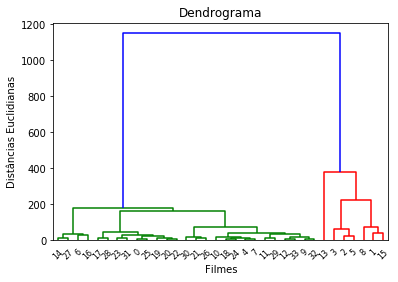

In [64]:
dendrograma = sch.dendrogram(sch.linkage(filmes_filtro, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Filmes')
plt.ylabel('Distâncias Euclidianas')
plt.show()


> A distância vertical no gráfico representa a distância entre as observações/grupos, a dissimilaridade entre aquelas observações ou grupos (a depender do nível observado). Uma maneira comum para analisar a quantidade de grupos no conjunto de dados é traçar linhas horizontais no dendrograma e verificar a quantidade de grupos evidentes e, em seguida, verificar a distância entre eles - nos interessa uma maior distância intergrupo. 
Outra maneira é através do [método do joelho/cotovelo](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9).

À primeira vista, vemos a presença de 2 grandes grupos. Com arestas verdes, há 3 agrupamentos de dados com uma distância pequena entre si, entretanto com uma distância maior em relação aos agrupamentos mais abaixo.

Do lado vermelho, essa distância já é menos evidente. 

Traçando uma linha pouco abaixo de y=400, temos **3 agrupamentos de dados**. 

Traçando uma linha em ~y=100, temos **6 agrupamentos de dados**.

#### Construindo o taggeamento dos grupos

In [66]:
modelo_hierarquico = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')

# O Ward tenta minimizar a variância em cada grupo.
# ward, single, average, and complete

In [48]:
modelo_hierarquico

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x1133fef28>)

In [80]:
modelo_hierarquico.fit_predict(filmes_filtro)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
print(modelo_hierarquico.labels_)

[1 0 0 0 1 0 1 1 0 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


A predição retorna justamente um array de inteiros correspondentes a identificação dos grupos traçados.

Visualizando os grupos identificados:

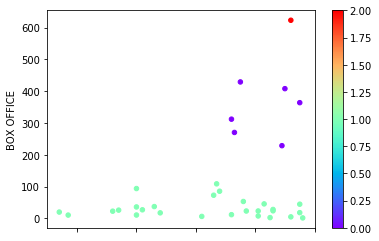

In [122]:
#plt.scatter(filmes_filtro.as_matrix(columns=filmes_filtro.columns[0:]),filmes_filtro.as_matrix(columns=filmes_filtro.columns[1:]),c=modelo_hierarquico.labels_, cmap='rainbow')

filmes_filtro.plot.scatter(x='RATING', y='BOX OFFICE', c=modelo_hierarquico.labels_, cmap='rainbow')

A partir do modelo foram identificados 3 grupos de filmes:
 
* Vermelho: Filmes que faturaram muito dinheiro com bilheteria e que tiveram uma ótima boa avaliação dos usuários;
* Verde: Filmes não faturaram muito em termos de bilheteria, entretanto a avaliação dos usuários varia bastante - podendo chegar até a ser melhor avaliado do que o filme que melhor faturou;
* Roxo: Um grupo mediano, que faturou razoávelmente e que teve uma boa aceitação pela crítica.

### E se utilizássemos um número diferente de grupos?

In [68]:
modelo_hierarquico_dois = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')

In [71]:
modelo_hierarquico_dois.fit_predict(filmes_filtro)

predicao_dois = modelo_hierarquico_dois.fit_predict(filmes_filtro)

In [73]:
predicao_dois

array([0, 1, 3, 3, 0, 3, 4, 0, 1, 0, 0, 0, 0, 2, 4, 1, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0])

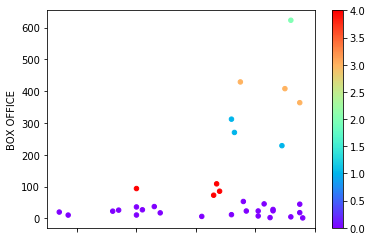

In [118]:
filmes_filtro.plot.scatter(x='RATING', y='BOX OFFICE', c=modelo_hierarquico_dois.labels_, cmap='rainbow')

### E se incluíssemos apenas a avaliação dos usuários? Geraríamos grupos diferentes?

In [119]:
filmes.head()

,RATING,TITLE,CREDIT,BOX OFFICE,YEAR
0,46.0,Ghost in the Shell,Major,37.1,2017
1,73.0,Sing,Ash,270.3,2016
2,90.0,Captain America: Civil War,Natasha Romanoff/Black Widow,408.1,2016
3,95.0,The Jungle Book,Kaa,364.0,2016
4,86.0,"Hail, Caesar!",DeeAnna Moran,28.0,2016


In [120]:
filmes_filtod = filmes[['RATING']] 

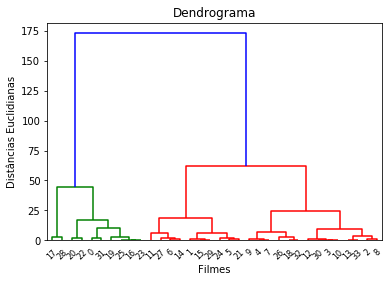

In [121]:
dendrograma = sch.dendrogram(sch.linkage(filmes_filtod, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Filmes')
plt.ylabel('Distâncias Euclidianas')
plt.show()

Já vemos uma considerável mudança na configuração dos grupos. 

Agrupamentos sempre irão gerar grupos, o que não quer dizer que eles são úteis.

> **A escala das tem influência no cálculo das distâncias?**
**Como solucionar isso?** Neste caso, Box Office tem uma escala completamente diferente (e desproporcional) a Rating. Já que isso influencia no cálculo das distâncias: SCALE!

O que mais:
    
    * Plotar o nome/código dos filmes nos pontos do gráfico
    * Scale e/ou PCA
    * Variar o número de grupos e verificar a saída

## K-Means

O K-Means também é um algoritmo de agrupamento (não-hierárquico) bastante utilizado.
Utilizaremos este algoritmo para responder a mesma questão acima e ver se temos uma diferenciação nos grupos gerados.

In [126]:
filmes_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
RATING        34 non-null float64
BOX OFFICE    34 non-null float64
dtypes: float64(2)
memory usage: 624.0 bytes


Por intuição, se tivéssemos que determinar a quantidade ótima de grupos para passar como parâmetro do modelo, teríamos que rodar o K-Means n vezes e analisar cada resultado de agrupamento - o que é pouco prático. 

Quando aumentamos a quantidade de grupos indefinidamente, as dissimilaridade entre grupos cai - aumentando a heterogeneidade de cada grupo. Daí a importância de encontrar o valor ótimo para a quantidade de grupos buscado: encontrar uma alta similaridade entre membros do mesmo grupo e baixa similaridade entre grupos distintos (ou membros de grupos distintos).

Outro modo (além da distância) de determinar o número de grupos a serem passados como parâmetro do modelo é o método do joelho ou do cotovelo.

A função abaixo calcula 14 vezes o K-Means, gerando uma saída que pode resultar entre 2 e 15 grupos distintos.

In [150]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(X = data)
        wcss.append(kmeans.inertia_)

    return wcss

Com isso, calculamos o WCSS (soma dos quadrados intra-cluster) para cada resultado do K-Means. Dado que o objetivo é minimizar o WCSS, vamos ao gráfico:

Text(0,0.5,'WCSS')

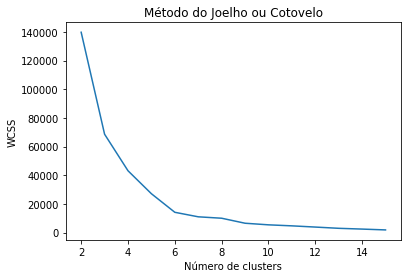

In [147]:
# Soma dos quadrados intra-cluster - WCSS (within- clusters sum-of-squares) 
plt.plot(range(2, 16), calculate_wcss(filmes_filtro))
plt.title('Método do Joelho ou Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [148]:
soma_dos_quadrados = calculate_wcss(filmes_filtro)

soma_dos_quadrados

[139777.59470899473,
 68652.0051851852,
 43163.33185185184,
 27143.06695652174,
 14192.688968253971,
 11042.238968253967,
 8346.562111111112,
 6735.257111111112,
 5445.43528138528,
 4836.719857142856,
 3885.397999999999,
 3093.9593333333323,
 2373.0911904761897,
 1949.2793333333327]

Já temos os valores da soma dos quadrados entra grupos. Como utilizamos isso para escolher o número de grupos?

"O ponto que indica o equilíbrio entre maior homogeneidade dentro do grupo e a maior diferença entre grupos, é o ponto da curva mais distante de uma reta traçada entre" o primeiro e o último ponto do gráfico acima. Isso pode ser calculado a partir da distância entre um ponto e uma reta.

A função abaixo calcula a distância entre cada ponto da curva e essa curva imaginária entre o primeiro o último ponto, nos retornando o ponto de distância máxima.

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [160]:
numero_de_grupos = optimal_number_of_clusters(soma_dos_quadrados)

numero_de_grupos

6

>Distintamente do exemplo com agrupamento hierárquico, encontramos que o número ótimo de grupos nesse caso são 6 grupos. Utilizaremos o valor para a construção do modelo:

In [157]:
kmeans = KMeans(n_clusters = numero_de_grupos)

grupos = kmeans.fit_predict(filmes_filtro)

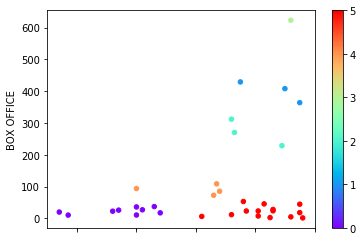

In [158]:
filmes_filtro.plot.scatter(x='RATING', y='BOX OFFICE', c=kmeans.labels_, cmap='rainbow')

Existem outras formas de determinar o número ótimo de grupos, esta apresentada acima foi apenas uma delas. Nas referências temos mais casos.